# KNN, Naive Bayes, Decision Tree and SVM Classifiers

## Importing requirements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics.pairwise import chi2_kernel
import warnings
warnings.filterwarnings("ignore")

## Balance Dataset

In [2]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data", 
                                sep = ',', header = None)
dataset.columns = ["Class", "Left-Weight", "Left-Distance", "Right-Weight", "Right_Distance"]
label_encoder = preprocessing.LabelEncoder()
dataset["Class"]= label_encoder.fit_transform(dataset["Class"])
X = dataset.iloc[: , 1:]
y = dataset.iloc[: , 0]
dataset

Class  Left-Weight  Left-Distance  Right-Weight  Right_Distance
0        0            1              1             1               1
1        2            1              1             1               2
2        2            1              1             1               3
3        2            1              1             1               4
4        2            1              1             1               5
..     ...          ...            ...           ...             ...
620      1            5              5             5               1
621      1            5              5             5               2
622      1            5              5             5               3
623      1            5              5             5               4
624      0            5              5             5               5

[625 rows x 5 columns]

## Hold Out Approach 70/30

### KNN

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [4]:
KNNclassifier = KNeighborsClassifier()
KNNclassifier.fit(X_train, y_train)
y_pred = KNNclassifier.predict(X_test)

In [5]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred) * 100)

[[ 1  6  6]
 [ 7 81  2]
 [ 6  3 76]]
              precision    recall  f1-score   support

           0       0.07      0.08      0.07        13
           1       0.90      0.90      0.90        90
           2       0.90      0.89      0.90        85

    accuracy                           0.84       188
   macro avg       0.63      0.62      0.62       188
weighted avg       0.84      0.84      0.84       188

accuracy =  84.04255319148936


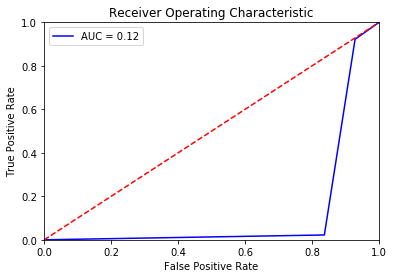

In [6]:
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Naive Bayes

In [7]:
nvb = GaussianNB()
nvb.fit(X_train,y_train)
y_pred = nvb.predict(X_test)

In [8]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred) * 100)

[[ 0  8  5]
 [ 0 88  2]
 [ 0  2 83]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.90      0.98      0.94        90
           2       0.92      0.98      0.95        85

    accuracy                           0.91       188
   macro avg       0.61      0.65      0.63       188
weighted avg       0.85      0.91      0.88       188

accuracy =  90.95744680851064


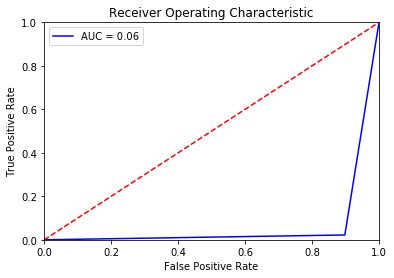

In [9]:
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [10]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)
y_pred = DTclassifier.predict(X_test)

In [11]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred) * 100)

[[ 0  6  7]
 [11 73  6]
 [14  4 67]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.88      0.81      0.84        90
           2       0.84      0.79      0.81        85

    accuracy                           0.74       188
   macro avg       0.57      0.53      0.55       188
weighted avg       0.80      0.74      0.77       188

accuracy =  74.46808510638297


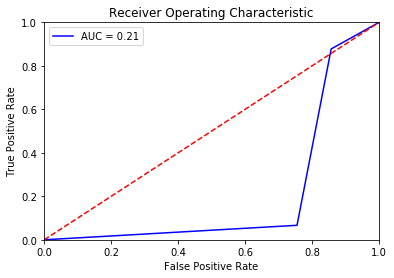

In [12]:
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM

In [13]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred) * 100)

[[ 1  6  6]
 [ 0 88  2]
 [ 0  2 83]]
              precision    recall  f1-score   support

           0       1.00      0.08      0.14        13
           1       0.92      0.98      0.95        90
           2       0.91      0.98      0.94        85

    accuracy                           0.91       188
   macro avg       0.94      0.68      0.68       188
weighted avg       0.92      0.91      0.89       188

accuracy =  91.48936170212765


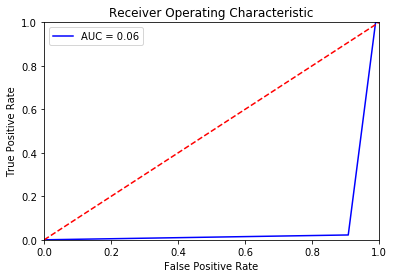

In [15]:
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
svclassifier = SVC(kernel = chi2_kernel).fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred) * 100)

[[ 0  7  6]
 [ 1 88  1]
 [ 0  0 85]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.93      0.98      0.95        90
           2       0.92      1.00      0.96        85

    accuracy                           0.92       188
   macro avg       0.62      0.66      0.64       188
weighted avg       0.86      0.92      0.89       188

accuracy =  92.02127659574468


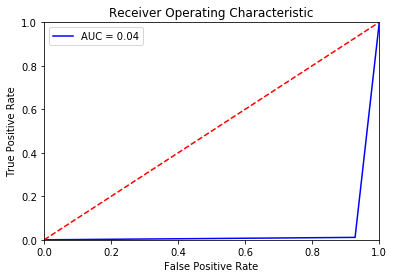

In [18]:
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 10 Fold CV

### KNN

In [19]:
all_accuracy = cross_val_score(KNNclassifier, X=X, y=y, cv=10)
print("Accuracy for 10 folds: ", all_accuracy)
print("Mean Accuracy: ", all_accuracy.mean() * 100)

Accuracy for 10 folds:  [0.76190476 0.74603175 0.58730159 0.79365079 0.74603175 0.74193548
 0.77419355 0.64516129 0.75806452 0.80645161]
Mean Accuracy:  73.60727086533538


### Naive Bayes

In [20]:
all_accuracy = cross_val_score(nvb, X=X, y=y, cv=10)
print("Accuracy for 10 folds: ", all_accuracy)
print("Mean Accuracy: ", all_accuracy.mean() * 100)

Accuracy for 10 folds:  [0.71428571 0.9047619  0.77777778 0.9047619  0.92063492 0.87096774
 0.90322581 0.87096774 0.90322581 0.64516129]
Mean Accuracy:  84.15770609318996


### Decision Tree

In [21]:
all_accuracy = cross_val_score(DTclassifier, X=X, y=y, cv=10)
print("Accuracy for 10 folds: ", all_accuracy)
print("Mean Accuracy: ", all_accuracy.mean() * 100)

Accuracy for 10 folds:  [0.47619048 0.6984127  0.58730159 0.79365079 0.74603175 0.69354839
 0.79032258 0.67741935 0.72580645 0.5483871 ]
Mean Accuracy:  67.37071172555042


## Flag Dataset

In [22]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", 
                                sep = ',', header = None)
dataset[0] = dataset[0].astype(str)
y = dataset.iloc[: , 6]
dataset.drop([6, 0], axis = 1, inplace = True)
dataset[17]= label_encoder.fit_transform(dataset[17])
dataset[28]= label_encoder.fit_transform(dataset[28])
dataset[29] = label_encoder.fit_transform(dataset[29])
X = dataset.iloc[: , :]
dataset

1   2     3   4   5   7   8   9   10  11  ...  20  21  22  23  24  25  \
0     5   1   648  16  10   0   3   5   1   1  ...   0   0   1   0   0   1   
1     3   1    29   3   6   0   0   3   1   0  ...   0   0   1   0   0   0   
2     4   1  2388  20   8   2   0   3   1   1  ...   0   0   1   1   0   0   
3     6   3     0   0   1   0   0   5   1   0  ...   0   0   0   0   1   1   
4     3   1     0   0   6   3   0   3   1   0  ...   0   0   0   0   0   0   
..   ..  ..   ...  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
189   6   3     3   0   1   0   0   3   1   0  ...   0   1   5   0   0   0   
190   3   1   256  22   6   0   3   4   1   0  ...   0   0   1   0   0   0   
191   4   2   905  28  10   0   0   4   1   1  ...   0   0   0   0   0   1   
192   4   2   753   6  10   3   0   4   1   1  ...   0   0   0   0   0   0   
193   4   2   391   8  10   0   7   5   1   1  ...   0   0   1   0   1   1   

     26  27  28  29  
0     0   0   0   4  
1     1   0   5   6  
2     0   0   3   7  
3     1   0   1   6  
4     0   0   1   6  
..   ..  ..  ..  ..  
189   0   0   1   6  
190   0   0   1   6  
191   1   0   3   4  
192   1   0   3   2  
193   1   0   3   4  

[194 rows x 28 columns]

## Hold Out Approach 70/30

### KNN

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [24]:
KNNclassifier = KNeighborsClassifier()
KNNclassifier.fit(X_train, y_train)
y_pred = KNNclassifier.predict(X_test)

In [25]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred) * 100)

[[ 1  1  5  0  0  0  2  0]
 [ 7 10  2  0  0  1  0  0]
 [ 1  2  6  0  0  0  1  0]
 [ 2  0  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 1  0  6  0  0  3  0  0]
 [ 0  1  0  0  0  3  1  0]
 [ 0  1  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.08      0.11      0.09         9
           1       0.67      0.50      0.57        20
           2       0.30      0.60      0.40        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.43      0.30      0.35        10
           6       0.25      0.20      0.22         5
           7       0.00      0.00      0.00         1

    accuracy                           0.36        59
   macro avg       0.22      0.21      0.20        59
weighted avg       0.38      0.36      0.35        59

accuracy =  35.59322033898305


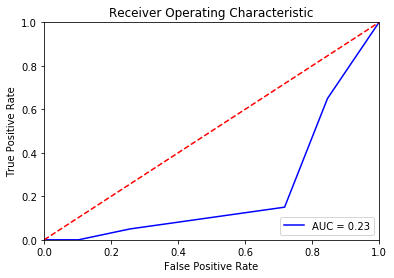

In [26]:
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Naive Bayes

In [27]:
nvb = GaussianNB()
nvb.fit(X_train,y_train)
y_pred = nvb.predict(X_test)

In [28]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred) * 100)

[[7 1 0 0 1 0 0 0]
 [7 8 0 0 1 1 3 0]
 [0 0 3 1 1 2 1 2]
 [1 0 0 0 0 0 2 0]
 [0 0 0 0 0 1 0 0]
 [0 1 2 0 0 6 1 0]
 [0 1 0 0 1 1 2 0]
 [0 0 0 1 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.47      0.78      0.58         9
           1       0.73      0.40      0.52        20
           2       0.60      0.30      0.40        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.55      0.60      0.57        10
           6       0.22      0.40      0.29         5
           7       0.00      0.00      0.00         1

    accuracy                           0.44        59
   macro avg       0.32      0.31      0.29        59
weighted avg       0.53      0.44      0.45        59

accuracy =  44.06779661016949


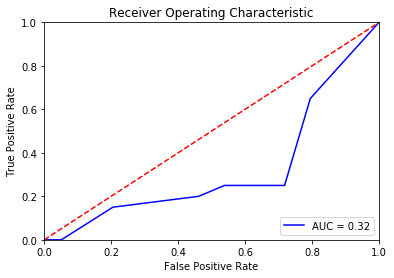

In [29]:
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [30]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)
y_pred = DTclassifier.predict(X_test)

In [31]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred) * 100)

[[ 8  0  0  0  0  0  1  0]
 [ 3 13  1  0  1  0  2  0]
 [ 0  0  8  1  0  1  0  0]
 [ 0  0  1  0  0  0  1  1]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  5  1  0  3  0  1]
 [ 1  3  0  0  0  0  1  0]
 [ 0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.81      0.65      0.72        20
           2       0.53      0.80      0.64        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.60      0.30      0.40        10
           6       0.20      0.20      0.20         5
           7       0.00      0.00      0.00         1

    accuracy                           0.56        59
   macro avg       0.35      0.35      0.34        59
weighted avg       0.59      0.56      0.55        59

accuracy =  55.932203389830505


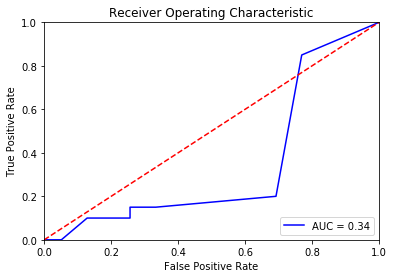

In [32]:
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM

In [33]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [34]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred) * 100)

[[ 0  4  5  0  0  0  0  0]
 [ 0 18  2  0  0  0  0  0]
 [ 0  7  3  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  5  5  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.41      0.90      0.56        20
           2       0.20      0.30      0.24        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1

    accuracy                           0.36        59
   macro avg       0.08      0.15      0.10        59
weighted avg       0.17      0.36      0.23        59

accuracy =  35.59322033898305


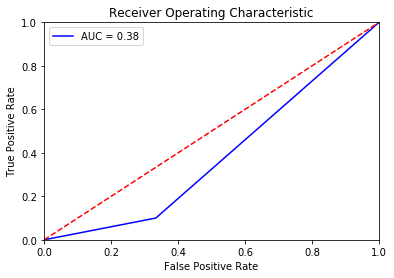

In [35]:
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
svclassifier = SVC(kernel = chi2_kernel).fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [37]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("accuracy = ", accuracy_score(y_test, y_pred) * 100)

[[ 0  9  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0]
 [ 0  9  1  0  0  0  0  0]
 [ 0  3  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.34      1.00      0.51        20
           2       1.00      0.10      0.18        10
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1

    accuracy                           0.36        59
   macro avg       0.17      0.14      0.09        59
weighted avg       0.29      0.36      0.20        59

accuracy =  35.59322033898305


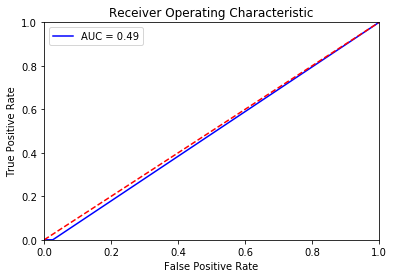

In [38]:
fpr, tpr, threshold = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'upper left')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 10 Fold CV

### KNN

In [39]:
all_accuracy = cross_val_score(KNNclassifier, X=X, y=y, cv=10)
print("Accuracy for 10 folds: ", all_accuracy)
print("Mean Accuracy: ", all_accuracy.mean() * 100)

Accuracy for 10 folds:  [0.45       0.4        0.2        0.3        0.36842105 0.42105263
 0.36842105 0.47368421 0.42105263 0.31578947]
Mean Accuracy:  37.18421052631579


### Naive Bayes

In [40]:
all_accuracy = cross_val_score(nvb, X=X, y=y, cv=10)
print("Accuracy for 10 folds: ", all_accuracy)
print("Mean Accuracy: ", all_accuracy.mean() * 100)

Accuracy for 10 folds:  [0.35       0.35       0.55       0.65       0.57894737 0.21052632
 0.47368421 0.26315789 0.15789474 0.52631579]
Mean Accuracy:  41.10526315789474


### Decision Tree

In [41]:
all_accuracy = cross_val_score(DTclassifier, X=X, y=y, cv=10)
print("Accuracy for 10 folds: ", all_accuracy)
print("Mean Accuracy: ", all_accuracy.mean() * 100)

Accuracy for 10 folds:  [0.45       0.75       0.6        0.7        0.57894737 0.47368421
 0.63157895 0.63157895 0.31578947 0.68421053]
Mean Accuracy:  58.15789473684211
